[Versión Interactiva](https://mybinder.org/v2/git/https%3A%2F%2Fgithub.com%2Fjuandadamo%2Fclases_fiuba/HEAD?filepath=6731%2Faletas.ipynb)

In [1]:
!pip install matplotlib numpy scipy

/bin/bash: línea 1: pip: orden no encontrada


In [2]:
%matplotlib widget
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.special import erf # doctest: +SCIPY

In [3]:
(10e-3/4)**0.5*5800

290.0

In [7]:
import scipy.integrate as integrate
import numpy as np                 #math module 

import matplotlib                  #Plotting module 
import matplotlib.pyplot as plt 
plt.ion()
#constants
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23           # Boltzmann constant
sigma = 5.6704e-8      #For later
width = 100            #For integrating. Increase for more accuracy
T = np.arange(1, 6000)
plot = []

for t in T:
    lambda_rel = h * c / (k * t)     #defining the reference lambda
    lambda_min = lambda_rel / width  #Defining lower int bound
    lambda_max = lambda_rel * width  #Defining upper int bound
    integrand = lambda x : (((2*h*(c**2))/(x**5))*(1/(np.exp((h*c)/(x*k*t))-1)))
    result,err = integrate.quad(integrand, lambda_min, lambda_max, epsabs=0, limit=50)
    plot.append(result)


Text(0.5, 1.0, "Plank's Formula over all spectra")

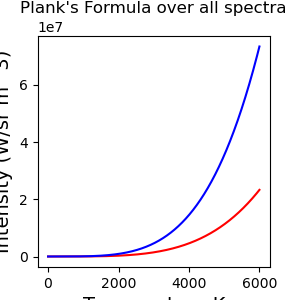

In [6]:
                
plt.figure(figsize=(3,3))        #Create a figure of a certain size
plt.plot(T,plot, 'r-')                      #Make a plot in the figure.
plt.plot(T, sigma * T**4, 'b-')    # Here I also plot the exact integral of the blackbody curve
plt.xlabel('Temperature K', fontsize=14)       #X Label 
plt.ylabel('Intensity (W/sr m^3)', fontsize=14)       #Y label
plt.title("Plank's Formula over all spectra")

/tmp/ipykernel_195826/3935656080.py:21: RuntimeWarning: divide by zero encountered in divide
  radiation = (2.0 * h * c**2) / (wavelengths**5 * (np.exp((h * c) / (wavelengths * k * T)) - 1))
/tmp/ipykernel_195826/3935656080.py:21: RuntimeWarning: invalid value encountered in multiply
  radiation = (2.0 * h * c**2) / (wavelengths**5 * (np.exp((h * c) / (wavelengths * k * T)) - 1))
/tmp/ipykernel_195826/3935656080.py:34: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral, _ = quad(lambda x: np.interp(x, wavelengths, radiation) * x, wavelength_min, wavelength_max)


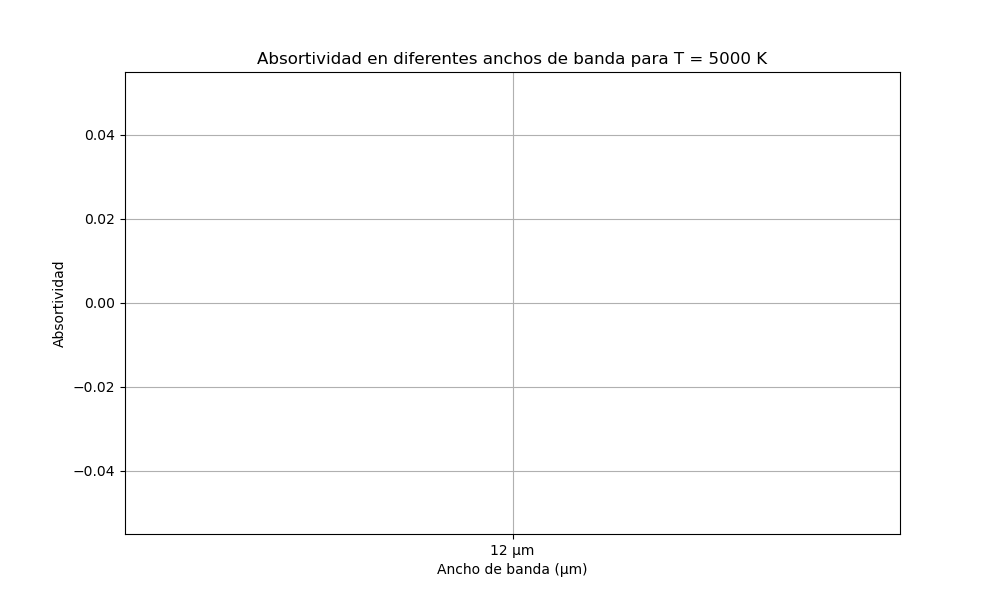

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constante de Boltzmann y longitud de onda máxima (en metros)
h = 6.626e-34  # Constante de Planck en J·s
c = 3.0e8      # Velocidad de la luz en m/s
k = 1.38e-23   # Constante de Boltzmann en J/K
wavelength_max = 100e-6  # Longitud de onda máxima (2 micrómetros)

# Temperatura del cuerpo negro en Kelvin
T = 5000  # Cambia la temperatura según lo desees

# Definir los anchos de banda en micrómetros
bandwidths = [12]  # Por ejemplo, tres anchos de banda

# Crear un rango de longitudes de onda de 0 a la longitud de onda máxima
wavelengths = np.linspace(0, wavelength_max, 1000)

# Calcular la radiación espectral utilizando la Ley de Planck
radiation = (2.0 * h * c**2) / (wavelengths**5 * (np.exp((h * c) / (wavelengths * k * T)) - 1))

# Normalizar la radiación para que la integral sea igual a 1 (opcional)
radiation /= radiation.sum()

# Calcular la absortividad en los anchos de banda específicos
absorptivities = []
for bandwidth in bandwidths:
    # Definir el rango de longitudes de onda para el ancho de banda
    wavelength_min = wavelength_max - bandwidth
    mask = (wavelengths >= wavelength_min) & (wavelengths <= wavelength_max)
    
    # Calcular la integral de la radiación dentro del ancho de banda
    integral, _ = quad(lambda x: np.interp(x, wavelengths, radiation) * x, wavelength_min, wavelength_max)
    
    # Calcular la absortividad como la fracción absorbida del ancho de banda
    absorptivity = 1.0 - integral
    absorptivities.append(absorptivity)

# Graficar la absortividad en función de los anchos de banda
plt.figure(figsize=(10, 6))
plt.bar([str(bandwidth) + ' μm' for bandwidth in bandwidths], absorptivities)
plt.xlabel('Ancho de banda (μm)')
plt.ylabel('Absortividad')
plt.title('Absortividad en diferentes anchos de banda para T = {} K'.format(T))
plt.grid()
plt.show()


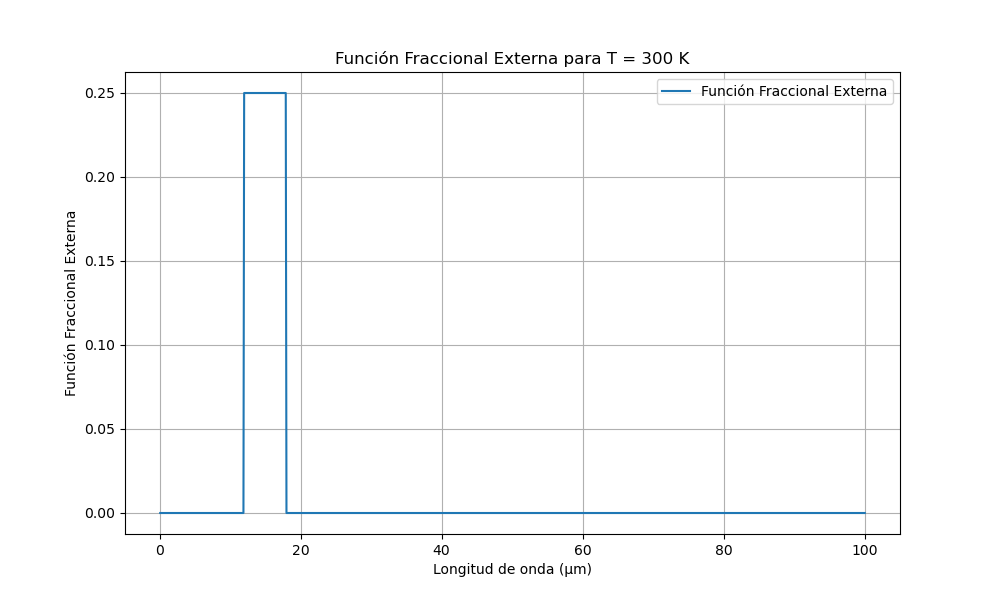

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Constante de Boltzmann y velocidad de la luz (en unidades adecuadas)
h = 6.626e-34  # Constante de Planck en J·s
c = 3.0e8      # Velocidad de la luz en m/s
k = 1.38e-23   # Constante de Boltzmann en J/K

# Temperatura del cuerpo negro en Kelvin
T = 300  # Cambia la temperatura según lo desees

# Longitudes de onda en micrómetros
wavelengths = np.linspace(0.1, 100, 1000)  # Cambia el rango según tu problema

# Función del cuerpo negro
radiation = (2.0 * h * c**2) / (wavelengths**5 * (np.exp((h * c) / (wavelengths * k * T)) - 1))

# Función fraccional externa (puedes definir esta función según tus necesidades)
def external_fractional_function(wavelength):
    # Aquí, define la función fraccional externa según tu problema
    # Esto puede depender de la longitud de onda y otros parámetros específicos.
    # Por ejemplo, puedes usar una función matemática o valores tabulados.

    # Este es solo un ejemplo simple:
    if 12 <= wavelength <= 18:
        return 0.25
    else:
        return 0.

# Calcular la función fraccional externa para cada longitud de onda
external_fraction = [external_fractional_function(w) for w in wavelengths]

# Graficar la función fraccional externa
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, external_fraction, label='Función Fraccional Externa')
plt.xlabel('Longitud de onda (μm)')
plt.ylabel('Función Fraccional Externa')
plt.title('Función Fraccional Externa para T = {} K'.format(T))
plt.legend()
plt.grid()
plt.show()


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constante de Boltzmann y velocidad de la luz (en unidades adecuadas)
h = 6.626e-34  # Constante de Planck en J·s
c = 3.0e8      # Velocidad de la luz en m/s
k = 1.38e-23   # Constante de Boltzmann en J/K

# Temperatura del cuerpo negro en Kelvin
T = 300  # Cambia la temperatura según lo desees

# Longitudes de onda en micrómetros
wavelengths = np.linspace(0.1, 100, 1000)  # Cambia el rango según tu problema

# Función del cuerpo negro
def blackbody_radiation(wavelength):
    return (2.0 * h * c**2) / (wavelength**5 * (np.exp((h * c) / (wavelength * k * T)) - 1))

# Función fraccional externa (puedes definir esta función según tus necesidades)
def external_fractional_function(wavelength):
    # Aquí, define la función fraccional externa según tu problema
    # Esto puede depender de la longitud de onda y otros parámetros específicos.
    # Por ejemplo, puedes usar una función matemática o valores tabulados.

    # Este es solo un ejemplo simple:
    #np.logical_and(wavelengths<18,wavelengths>12)
    #if 12 <= wavelength <= 18:
    #    return 0.25
    #else:
    #    return 0.
    return np.logical_or(wavelengths>18,wavelengths<12).astype(float)*0.25

# Calcular la absorción total


 


In [63]:
np.trapz(blackbody_radiation(wavelengths)*external_fractional_function(wavelengths),wavelengths)/np.trapz(blackbody_radiation(wavelengths),wavelengths)

0.24999994087383526

In [61]:
external_fractional_function(wavelengths)

array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25])

In [66]:
5.67e-8*T**4

459.27

In [67]:
np.trapz(blackbody_radiation(wavelengths),wavelengths)

1.4461707449012755e-09

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

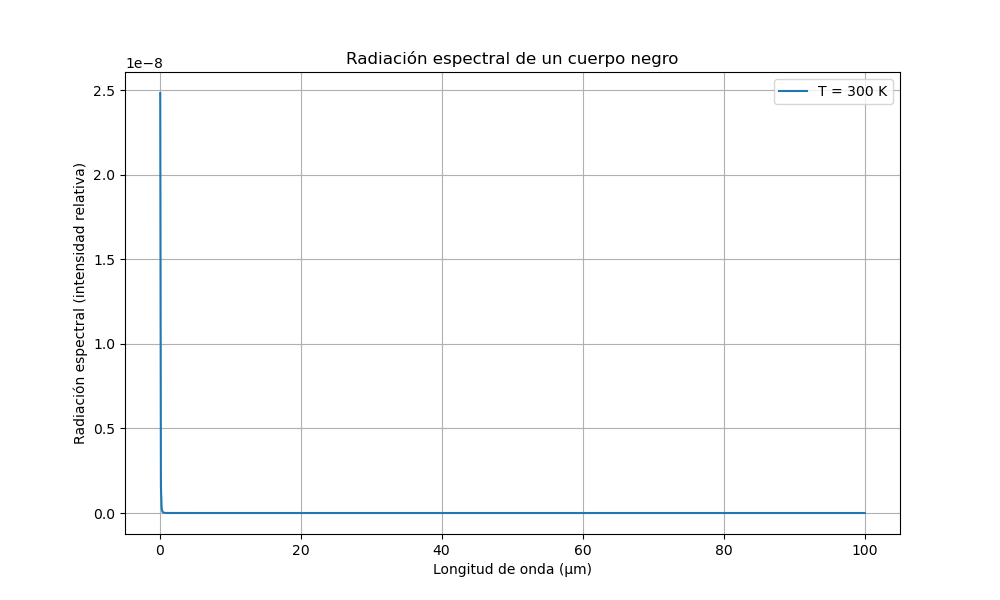

Radiación total calculada: 1.46e+02 W/m^2
Radiación total esperada (ley de Stefan-Boltzmann): 4.59e+02 W/m^2


In [70]:
import numpy as np
import scipy.constants as const
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constantes
h = const.Planck  # Constante de Planck en J·s
c = const.speed_of_light  # Velocidad de la luz en m/s
k = const.Boltzmann  # Constante de Boltzmann en J/K

# Temperatura del cuerpo negro en Kelvin
T = 300  # Cambia la temperatura según lo desees

# Función de Planck para la radiación espectral
def planck(wavelength):
    return (2.0 * h * c**2 / wavelength**5) / (np.exp(h * c / (wavelength * k * T)) - 1)

# Longitudes de onda en micrómetros
wavelength_min = 0.1  # Cambia el rango según tu problema
wavelength_max = 100.0

# Calcular la radiación total (integramos la función de Planck)
total_radiation, _ = quad(planck, wavelength_min * 1e-6, wavelength_max * 1e-6)

# Ley de Stefan-Boltzmann
sigma = const.Stefan_Boltzmann
expected_total_radiation = sigma * T**4

# Graficar la función de Planck
wavelengths = np.linspace(wavelength_min, wavelength_max, 1000)
radiation = [planck(w) for w in wavelengths]

plt.figure(figsize=(10, 6))
plt.plot(wavelengths, radiation, label=f'T = {T} K')
plt.xlabel('Longitud de onda (μm)')
plt.ylabel('Radiación espectral (intensidad relativa)')
plt.title('Radiación espectral de un cuerpo negro')
plt.legend()
plt.grid()
plt.show()

print(f'Radiación total calculada: {total_radiation:.2e} W/m^2')
print(f'Radiación total esperada (ley de Stefan-Boltzmann): {expected_total_radiation:.2e} W/m^2')


/tmp/ipykernel_195826/3128854029.py:16: RuntimeWarning: overflow encountered in exp
  return (2.0 * h * c**2 / wavelength**5) / (np.exp(h * c / (wavelength * k * T)) - 1)


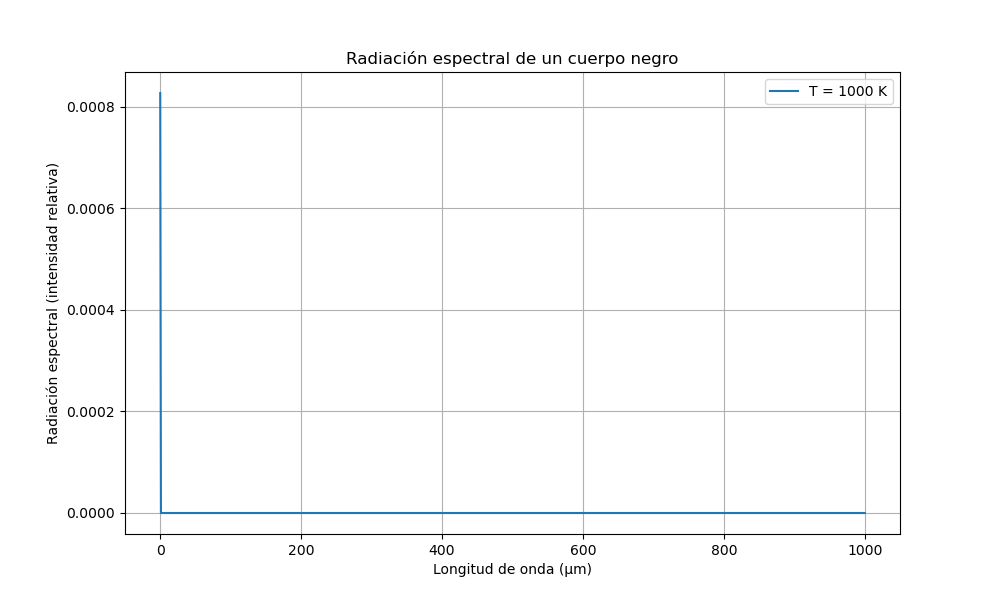

Radiación total calculada: 1.80e+04 W/m^2
Radiación total esperada (ley de Stefan-Boltzmann): 5.67e+04 W/m^2


In [73]:
import numpy as np
import scipy.constants as const
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constantes
h = const.Planck  # Constante de Planck en J·s
c = const.speed_of_light  # Velocidad de la luz en m/s
k = const.Boltzmann  # Constante de Boltzmann en J/K

# Temperatura del cuerpo negro en Kelvin
T = 1000  # Cambia la temperatura según lo desees

# Función de Planck para la radiación espectral
def planck(wavelength):
    return (2.0 * h * c**2 / wavelength**5) / (np.exp(h * c / (wavelength * k * T)) - 1)

# Longitudes de onda en micrómetros
wavelength_min = 0.01  # Cambia el rango según tu problema
wavelength_max = 1000.0

# Calcular la radiación total (integramos la función de Planck)
total_radiation, _ = quad(planck, wavelength_min * 1e-6, wavelength_max * 1e-6)

# Ley de Stefan-Boltzmann
sigma = const.Stefan_Boltzmann
expected_total_radiation = sigma * T**4

# Graficar la función de Planck
wavelengths = np.linspace(wavelength_min, wavelength_max, 1000)
radiation = [planck(w) for w in wavelengths]

plt.figure(figsize=(10, 6))
plt.plot(wavelengths, radiation, label=f'T = {T} K')
plt.xlabel('Longitud de onda (μm)')
plt.ylabel('Radiación espectral (intensidad relativa)')
plt.title('Radiación espectral de un cuerpo negro')
plt.legend()
plt.grid()
plt.show()

print(f'Radiación total calculada: {total_radiation:.2e} W/m^2')
print(f'Radiación total esperada (ley de Stefan-Boltzmann): {expected_total_radiation:.2e} W/m^2')


In [74]:
0.75**2

0.5625

In [75]:
1-0.5625

0.4375